<a href="https://colab.research.google.com/github/AshikSathiya/Project2/blob/main/Project_2_Cirrhosis_Prediction_Dataset_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cirrhosis Prediction Dataset Cleaning
Ashik Sathiya


---



#Import Packages and Load Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load the dataset
fpath = '/content/drive/MyDrive/CodingDojo/Project 2/cirrhosis.csv'
df = pd.read_csv(fpath, header=None)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       419 non-null    object
 1   1       419 non-null    object
 2   2       419 non-null    object
 3   3       313 non-null    object
 4   4       419 non-null    object
 5   5       419 non-null    object
 6   6       313 non-null    object
 7   7       313 non-null    object
 8   8       313 non-null    object
 9   9       419 non-null    object
 10  10      419 non-null    object
 11  11      285 non-null    object
 12  12      419 non-null    object
 13  13      311 non-null    object
 14  14      313 non-null    object
 15  15      313 non-null    object
 16  16      283 non-null    object
 17  17      408 non-null    object
 18  18      417 non-null    object
 19  19      413 non-null    object
dtypes: object(20)
memory usage: 65.6+ KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.6,156,1718,137.95,172,190,12.2,4
2,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
3,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516,96.1,55,151,12,4
4,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4


* There are are 419 rows and 20 columns.
* All columns appear to be categorical
* The header also appears to be incorrect, we want to make the first row the header

#Data Cleaning

##Change Header

In [4]:
#grab the first row for the header
new_header = df.iloc[0]
#take the data less the header row
df = df[1:]
#set the header row as the df header
df.columns = new_header

In [5]:
for col in df.columns:
    print(col)

ID
N_Days
Status
Drug
Age
Sex
Ascites
Hepatomegaly
Spiders
Edema
Bilirubin
Cholesterol
Albumin
Copper
Alk_Phos
SGOT
Tryglicerides
Platelets
Prothrombin
Stage


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 1 to 418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             418 non-null    object
 1   N_Days         418 non-null    object
 2   Status         418 non-null    object
 3   Drug           312 non-null    object
 4   Age            418 non-null    object
 5   Sex            418 non-null    object
 6   Ascites        312 non-null    object
 7   Hepatomegaly   312 non-null    object
 8   Spiders        312 non-null    object
 9   Edema          418 non-null    object
 10  Bilirubin      418 non-null    object
 11  Cholesterol    284 non-null    object
 12  Albumin        418 non-null    object
 13  Copper         310 non-null    object
 14  Alk_Phos       312 non-null    object
 15  SGOT           312 non-null    object
 16  Tryglicerides  282 non-null    object
 17  Platelets      407 non-null    object
 18  Prothrombin    416 non-null   

##Check Data Types and Convert

In [7]:
df.select_dtypes("object")

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.6,156,1718,137.95,172,190,12.2,4
2,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
3,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516,96.1,55,151,12,4
4,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
5,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671,113.15,72,136,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174,10.9,3
415,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180,11.2,4
416,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143,9.9,3
417,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269,10.4,3


Convert Age, Bilirubin,	Cholesterol,	Albumin,	Copper,	Alk_Phos,	SGOT,	Tryglicerides,	Platelets,	Prothrombin,	Stage

In [8]:
# Save list of Columns we want to convert to integer
columns_to_convert = ['N_Days','Age', 'Cholesterol', 'Copper', 'Tryglicerides', 'Platelets', 'Stage']

#Convert 'Nan' to 0
df[columns_to_convert] = df[columns_to_convert].fillna(0).astype(int)

#Convert Columns to Integer
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [9]:
#Convert to float
columns_to_convert2 = ['Bilirubin','Albumin', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Prothrombin']

#Convert 'Nan' to 0
df[columns_to_convert2] = df[columns_to_convert2].fillna(0).astype(float)

#Convert Columns to Integer
df[columns_to_convert2] = df[columns_to_convert2].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 1 to 418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    object 
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    int64  
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    int64  
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    int64  
 18  Prothrombi

In [11]:
df.select_dtypes("object")

,ID,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
1,1,D,D-penicillamine,F,Y,Y,Y,Y
2,2,C,D-penicillamine,F,N,Y,Y,N
3,3,D,D-penicillamine,M,N,N,N,S
4,4,D,D-penicillamine,F,N,Y,Y,S
5,5,CL,Placebo,F,N,Y,Y,N
...,...,...,...,...,...,...,...,...
414,414,D,NaN,F,NaN,NaN,NaN,N
415,415,C,NaN,F,NaN,NaN,NaN,N
416,416,C,NaN,F,NaN,NaN,NaN,N
417,417,C,NaN,F,NaN,NaN,NaN,N


##Drop Unwanted Columns

We do not need the ID Column

In [12]:
#Drop ID Column
df.drop("ID", axis=1, inplace = True)
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172.0,190,12.2,4
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88.0,221,10.6,3
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55.0,151,12.0,4
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92.0,183,10.3,4
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72.0,136,10.9,3


##Rename Coumns

In [13]:
#Rename N_Days and SGOT Columns

#Create Dictionary
columns={"N_Days":"Days_Since_Registration", "SGOT":"SGOT_Levels"}
df.rename(columns,axis=1, inplace = True)
df.head()


,Days_Since_Registration,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT_Levels,Tryglicerides,Platelets,Prothrombin,Stage
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172.0,190,12.2,4
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88.0,221,10.6,3
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55.0,151,12.0,4
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92.0,183,10.3,4
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72.0,136,10.9,3


##Duplicate Rows

In [14]:
#Check for sduplicated rows
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

There appears to be no duplicates present within the dataset

##Check Unique Identifers

In [15]:
#Check percentage of unique values within each column
unique_num = df.nunique()
unique_num / len(df) *100

0
Days_Since_Registration    95.454545
Status                      0.717703
Drug                        0.478469
Age                        82.296651
Sex                         0.478469
Ascites                     0.478469
Hepatomegaly                0.478469
Spiders                     0.478469
Edema                       0.717703
Bilirubin                  23.444976
Cholesterol                48.325359
Albumin                    36.842105
Copper                     38.038278
Alk_Phos                   70.813397
SGOT_Levels                43.062201
Tryglicerides              35.167464
Platelets                  58.373206
Prothrombin                11.722488
Stage                       1.196172
dtype: float64

It appears that no column is comprised of 100 percent unique values, which would not be helpful to us.

##Missing Values

In [16]:
# Get the number of null values for all columns and save as a variable
null_sums = df.isna().sum()
null_sums /len(df) *100

0
Days_Since_Registration     0.000000
Status                      0.000000
Drug                       25.358852
Age                         0.000000
Sex                         0.000000
Ascites                    25.358852
Hepatomegaly               25.358852
Spiders                    25.358852
Edema                       0.000000
Bilirubin                   0.000000
Cholesterol                 0.000000
Albumin                     0.000000
Copper                      0.000000
Alk_Phos                    0.000000
SGOT_Levels                 0.000000
Tryglicerides               0.000000
Platelets                   0.000000
Prothrombin                 0.000000
Stage                       0.000000
dtype: float64

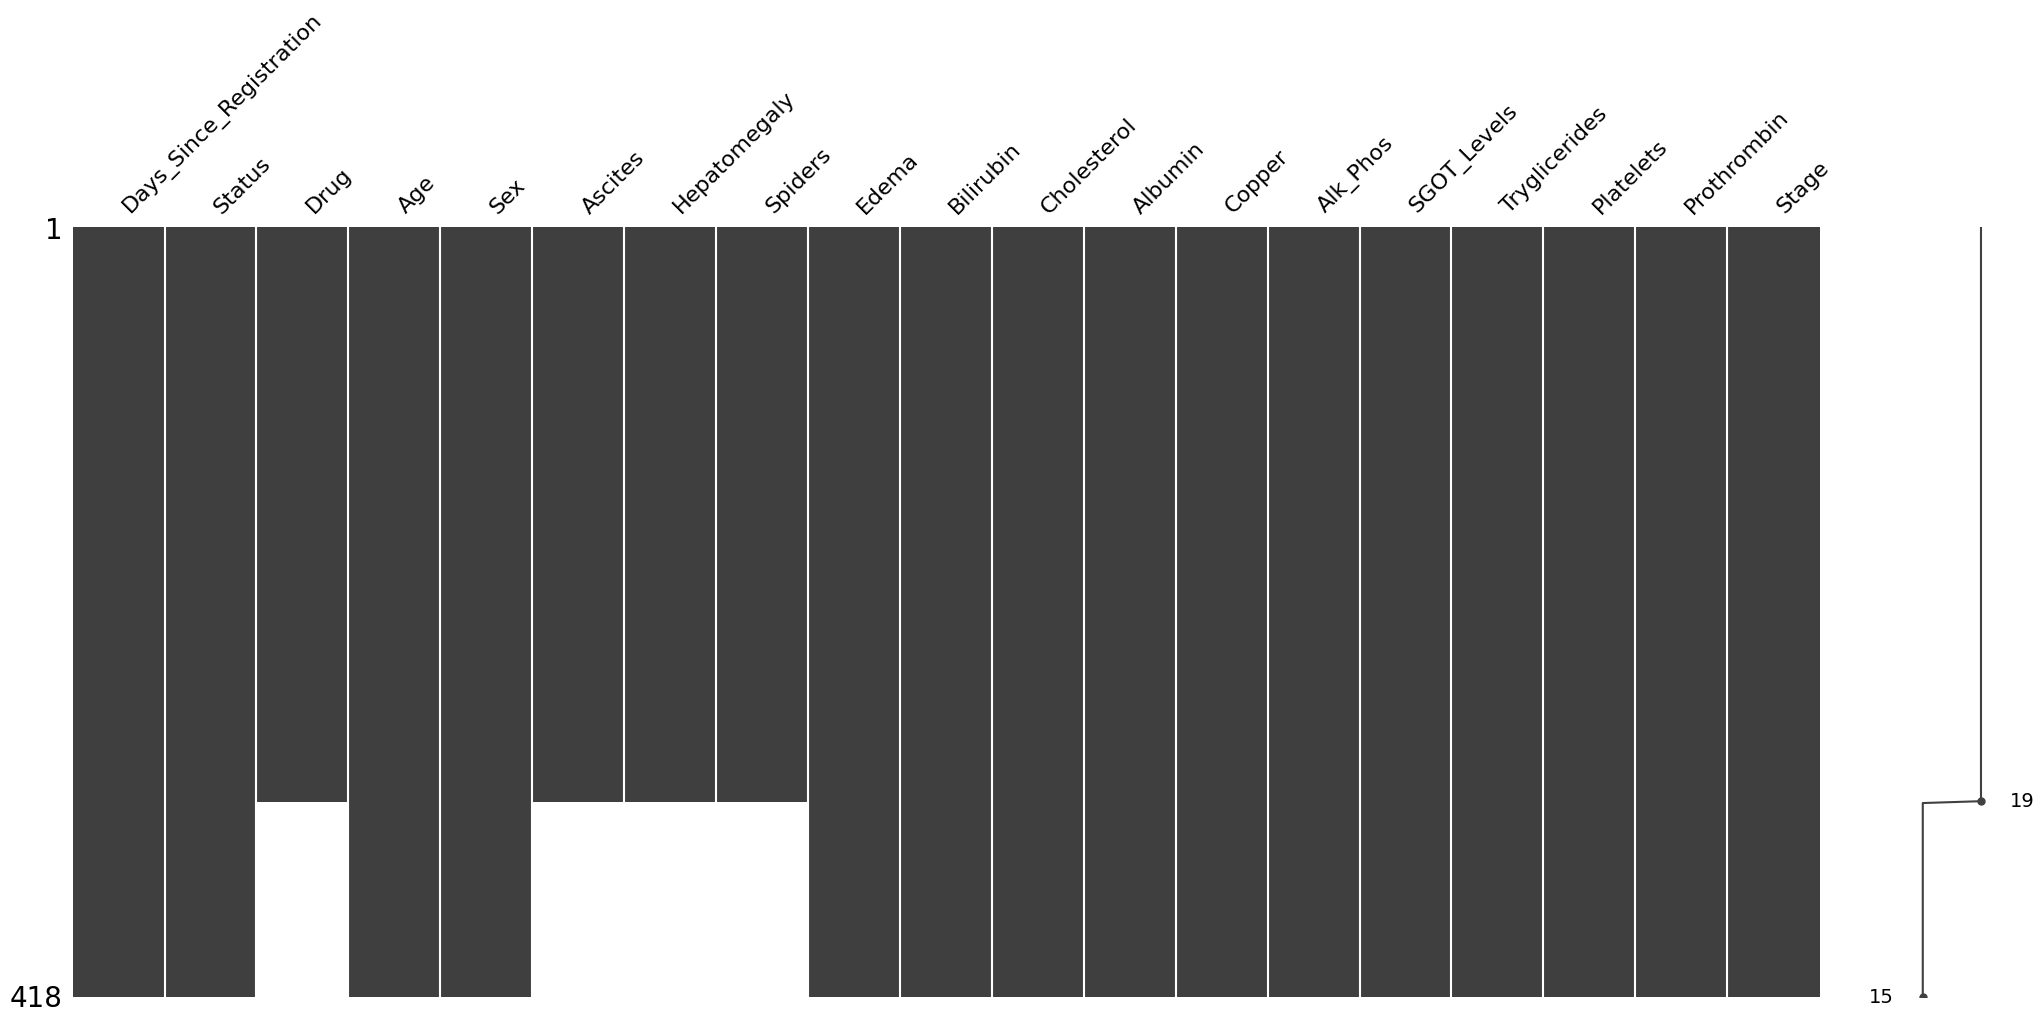

In [17]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df);

It appears that three columns ("Drug", "Ascites", "Hepatomegaly", "Spiders") have the same amount of missing values near the end of the datset.

We will address these when we are creating our column transformer

Because these are all object columns we will need to impute them with "MISSING"

##Consistent Values

In [18]:
object_cols = df.select_dtypes("object").columns
object_unique = df[object_cols].nunique()
object_unique

0
Status          3
Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
dtype: int64

In [19]:
# Remake the list of string columns (after dropping previous cols)
string_columns = df.select_dtypes(include='object').columns

# loop through the list of string columns
for col in string_columns:
    value_counts = df[col].value_counts()
  # print the value counts for the column
    print(value_counts)
  # Print an empty line for readability
    print()

C     232
D     161
CL     25
Name: Status, dtype: int64

D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

F    374
M     44
Name: Sex, dtype: int64

N    288
Y     24
Name: Ascites, dtype: int64

Y    160
N    152
Name: Hepatomegaly, dtype: int64

N    222
Y     90
Name: Spiders, dtype: int64

N    354
S     44
Y     20
Name: Edema, dtype: int64



There are no inconsistent Values in any of the object columns

##Feature Manipulation (Age/Days_Since_Registration)

Both Age and Days_Since_Registration columns are in days which is not very helpful

In [20]:
# Using 365.25 for more accurate conversion considering leap years
df['Age_Years'] = df["Age"] / 365.25
df.drop("Age", axis=1, inplace = True)

df['Years_Since_Registration'] = df['Days_Since_Registration'] / 365.25
df.drop("Days_Since_Registration", axis=1, inplace = True)

#Reorder dataframe
# Move columns 'Age_Years' and 'Years_Since_Registration' to a new order
df.insert(0, 'Age_Years', df.pop('Age_Years'))
df.insert(1, 'Years_Since_Registration', df.pop('Years_Since_Registration'))

df.head()

,Age_Years,Years_Since_Registration,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT_Levels,Tryglicerides,Platelets,Prothrombin,Stage
1,58.765229,1.095140,D,D-penicillamine,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172.0,190,12.2,4
2,56.446270,12.320329,C,D-penicillamine,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88.0,221,10.6,3
3,70.072553,2.770705,D,D-penicillamine,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55.0,151,12.0,4
4,54.740589,5.270363,D,D-penicillamine,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92.0,183,10.3,4
5,38.105407,4.117728,CL,Placebo,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72.0,136,10.9,3


##Check Outliers

In [22]:
df.describe()

,Age_Years,Years_Since_Registration,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT_Levels,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,50.741551,5.250602,3.220813,251.055024,3.497440,72.418660,1479.877033,91.477464,84.129187,250.260766,10.680383,2.980861
std,10.447214,3.024430,4.407506,257.528158,0.424972,85.222515,2040.234621,72.439428,79.256876,105.402399,1.260637,0.946845
min,26.277892,0.112252,0.300000,0.000000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.832307,2.991786,0.800000,0.000000,3.242500,0.000000,0.000000,0.000000,0.000000,181.000000,10.000000,2.000000
50%,51.000684,4.736482,1.400000,252.500000,3.530000,50.500000,1009.000000,90.450000,85.000000,248.000000,10.600000,3.000000
75%,58.240931,7.155373,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000,4.000000
max,78.439425,13.127995,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


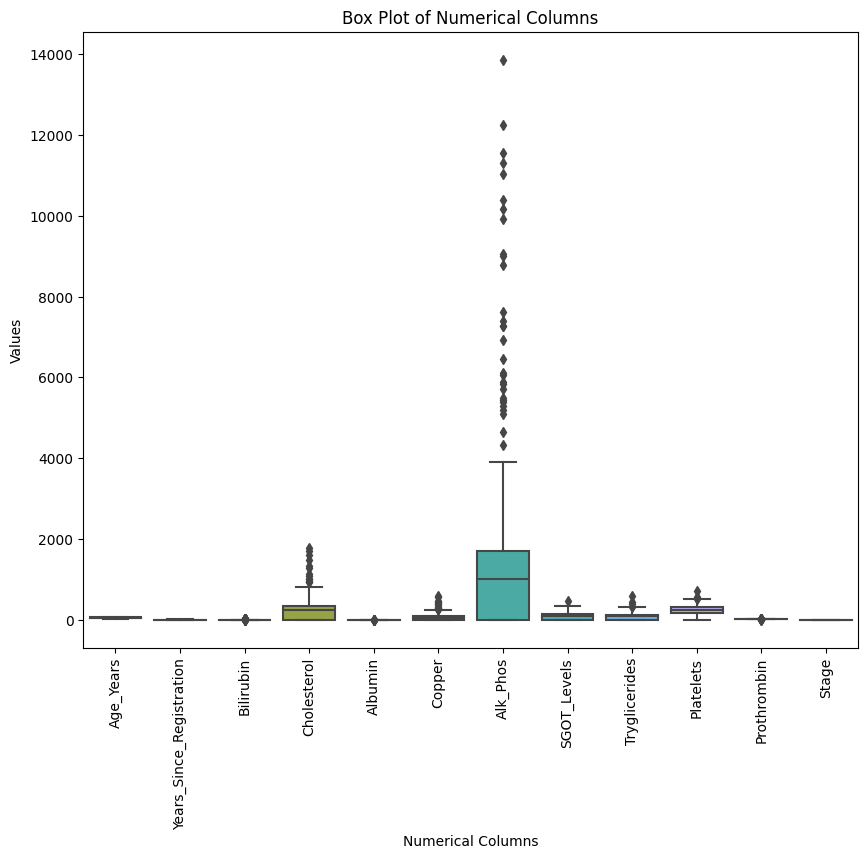

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# Select only the numerical columns for box plot
numerical_columns = df.select_dtypes(include='number')

# Create box plots for each numerical column
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.boxplot(data=numerical_columns)


# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
plt.xlabel("Numerical Columns")
plt.ylabel("Values")
plt.title("Box Plot of Numerical Columns")
plt.show()

There are many outliers in the Cholestrol and Alk_Phos columns

#Exploratory Data Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age_Years                 418 non-null    float64
 1   Years_Since_Registration  418 non-null    float64
 2   Status                    418 non-null    object 
 3   Drug                      312 non-null    object 
 4   Sex                       418 non-null    object 
 5   Ascites                   312 non-null    object 
 6   Hepatomegaly              312 non-null    object 
 7   Spiders                   312 non-null    object 
 8   Edema                     418 non-null    object 
 9   Bilirubin                 418 non-null    float64
 10  Cholesterol               418 non-null    int64  
 11  Albumin                   418 non-null    float64
 12  Copper                    418 non-null    int64  
 13  Alk_Phos                  418 non-null    float64
 14  SGOT_Level

##Correlation Heatmap

[Text(0.5, 1.0, 'Correlation Heatmap')]

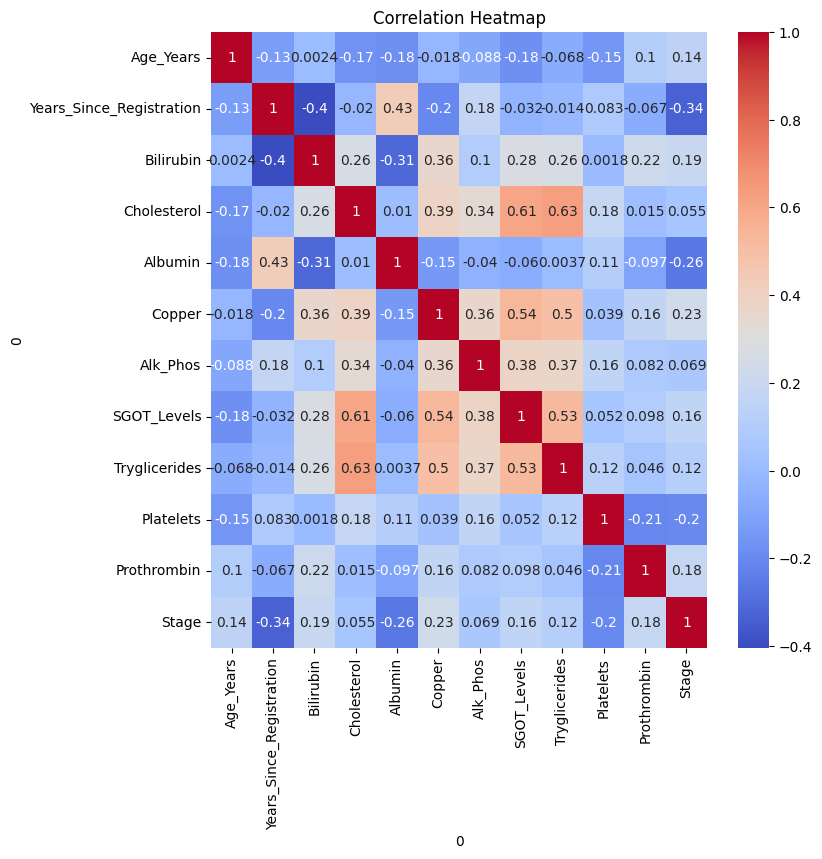

In [27]:
# Find correlations
corr = df.corr(numeric_only = True)
corr.round(2)

# Make a heatmap using the correlations from above
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

ax.set(title='Correlation Heatmap')

##Histogram

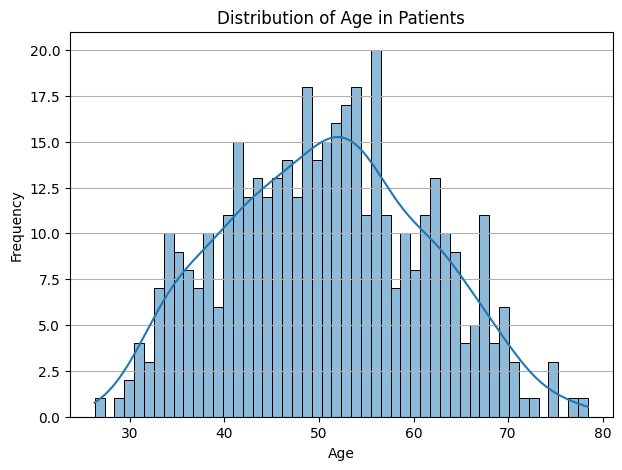

In [31]:
# Create a histogram
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Age_Years', bins=50, kde=True)

# plot title
plt.title('Distribution of Age in Patients')

# axis labels
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add gridlines
plt.grid(axis='y')

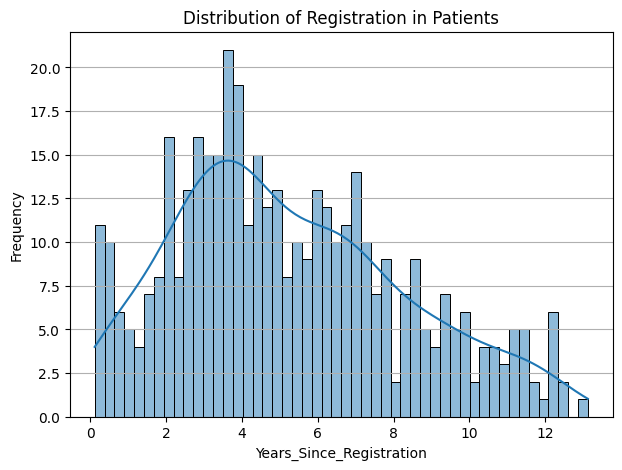

In [51]:
# Create a histogram
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Years_Since_Registration', bins=50, kde=True)

# plot title
plt.title('Distribution of Registration in Patients')

# axis labels
plt.xlabel('Years_Since_Registration')
plt.ylabel('Frequency')

# Add gridlines
plt.grid(axis='y')

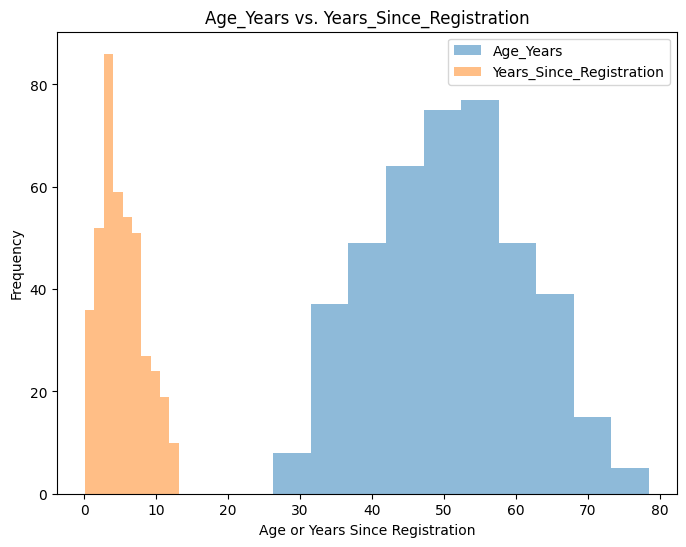

In [50]:
# Create a histogram for Age_Years
plt.figure(figsize=(8, 6))
plt.hist(data=df, x='Age_Years', bins=10, alpha=0.5, label='Age_Years')

# Create a histogram for Years_Since_Registration
plt.hist(data=df, x='Years_Since_Registration', bins=10, alpha=0.5, label='Years_Since_Registration')

plt.xlabel('Age or Years Since Registration')
plt.ylabel('Frequency')
plt.title('Age_Years vs. Years_Since_Registration')
plt.legend()
plt.show()

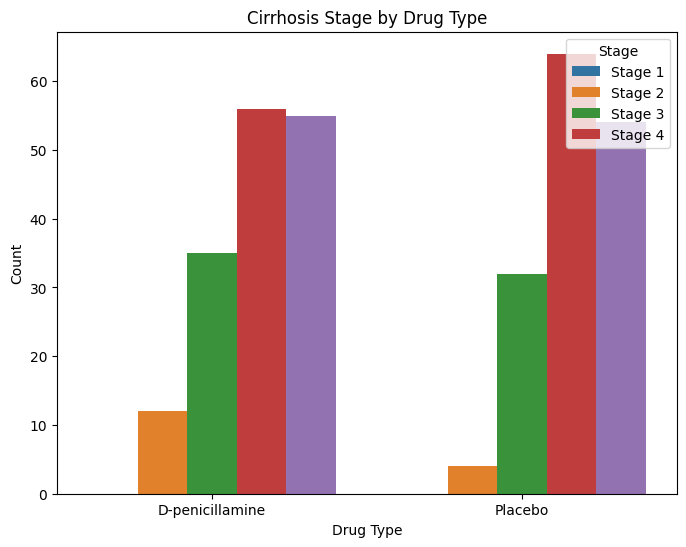

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='Drug', hue='Stage', data=df)
plt.xlabel("Drug Type")
plt.ylabel("Count")
plt.title("Cirrhosis Stage by Drug Type")
plt.legend(title="Stage", loc="upper right", labels=["Stage 1", "Stage 2", "Stage 3", "Stage 4"])
plt.show()

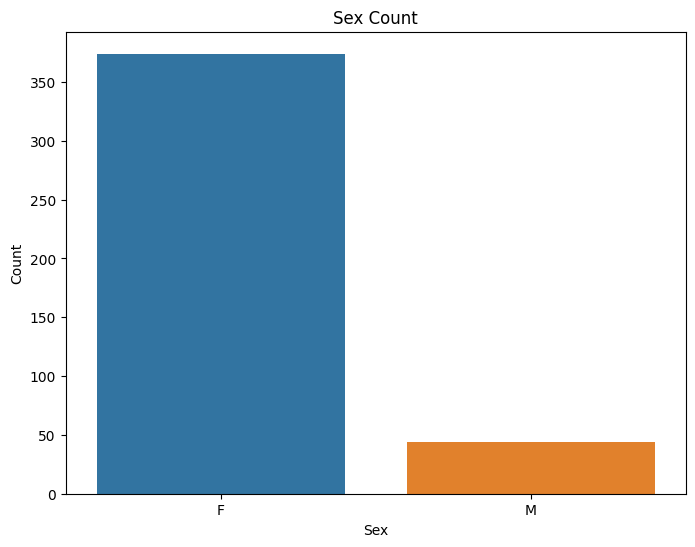

In [54]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Count")
plt.show()

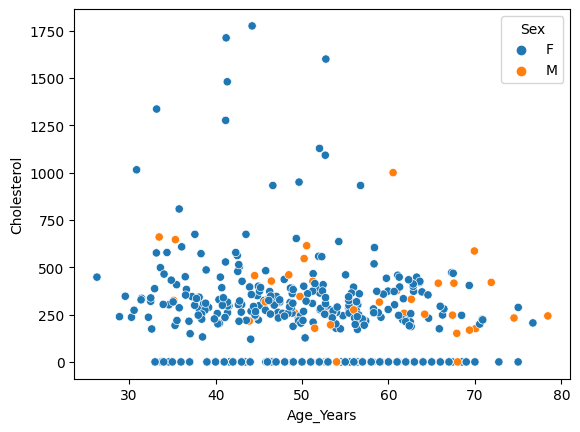

In [52]:
# Creating a scatterplot using Central Air as the hue argument
ax = sns.scatterplot(data=df, x="Age_Years" , y="Cholesterol",
                     hue="Sex");